In [1]:
from AnastrisTNG import TNGsimulation, TNGtools, Anatools  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
run = 'TNG50'
BasePath = '/home/dumin/IllustrisTNG/' + run + '-1/output/'         
snap=99                                                            

In [3]:
Snapshot=TNGsimulation.Snapshot(BasePath,snap)                    

In [4]:
sub12 = Snapshot.load_particle(12) #载入ID12subhalo

In [5]:
sub12.physical_units()   #单位物理化

In [6]:
sub12.face_on(alignwith='star',rmax=10)  #中心10kpc内的 恒星角动量 进行face on

In [ ]:
sub12.face_on(alignwith='star',rmax=10, alignmode='moi')  #中心10kpc内的 恒星质量矩 进行face on
sub12.face_on(alignwith='star',rmax=10, alignmode='krot')  #中心10kpc内的 恒星krot最大值方向 进行face on

# alignwith  可以使用 'all' 所有物质   ; 'star' 恒星粒子；  'gas' 气体粒子； 'baryon' 重子物质；   'dm' 暗物质 
# retmatrix, default =False, 如果为True，则返回转动矩阵
# 可以使用rmax，zmax，Rmax 等 来限制选择粒子的范围。也可以传入 sele = (bool) 的元组，自定义粒子的选取。
#   rmax 默认为 None，即不对范围进行限制

In [10]:
sub12.center()    #中心坐标 mode 默认为 'ssc'

SimArray([1.97665123e-05, 4.55601519e-06, 7.35751815e-06], 'kpc')

In [11]:
sub12.vel_center()  #中心速度 

SimArray([-0.00253168,  0.00056223, -0.00042106], 'km s**-1')

In [12]:
sub12.face_on(mode='hyb',alignwith='star',rmax=8)  #利用'hyb 模式计算中心坐标，移到中心后，再以 8kpc内恒星 计算角动量方向
# 涉及到 计算引力势，

There is no phi in the keyword
Calculating gravity and it will take tens of seconds
Calculate by using Octree


In [13]:
sub12['phi']   #引力势

SimArray([-143543.39276709, -139750.63884369, -142743.9275582 , ...,
           -54147.90577059,  -57260.0472045 , -142562.11934337], 'km**2 s**-2')

In [17]:
print(sub12.center(mode='ssc'),) 
print(sub12.center(mode='pot'),) #势能最低点
print(sub12.center(mode='com'),) #质心
print(sub12.center('hyb'))
#几种不同方法计算的中心位置 

[3.30587200e-04 8.37873952e-05 4.81278613e-04]
[-0.00267187 -0.0067852  -0.00576023]
[0.25580652 0.50446822 0.02419558]
[-3.94725590e-11  1.17142843e-11 -7.59945993e-11]


In [ ]:
sub12.face_on(mode='hyb',alignwith='baryon',rmax=8)   

In [18]:
image_xy=np.histogram2d(sub12.s['x'],sub12.s['y'],bins=[200,200],range=[[-15,15],[-15,15]],weights=sub12.s['mass'],)[0]/(0.15*0.15)

In [26]:
image_xz=np.histogram2d(sub12.s['x'],sub12.s['z'],bins=[200,200],range=[[-15,15],[-15,15]],weights=sub12.s['mass'],)[0]/(0.15*0.15)

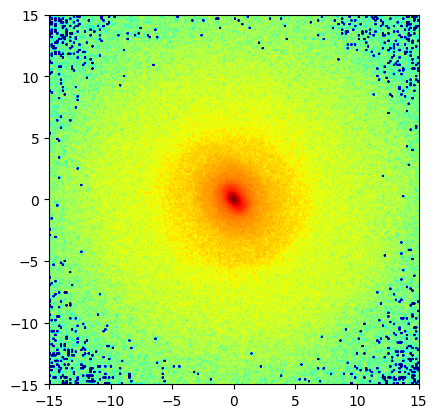

In [30]:
plt.imshow(np.log10(image_xy+1).T,plt.cm.jet,extent=(-15,15,-15,15),vmin=4)

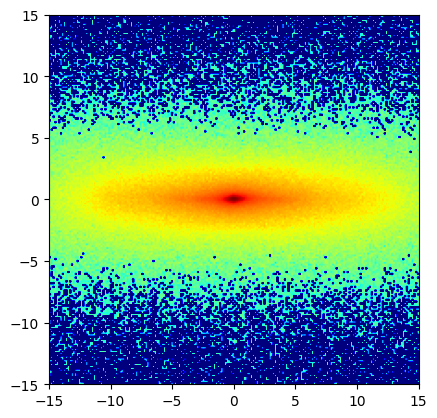

In [31]:
plt.imshow(np.log10(image_xz+1).T,plt.cm.jet,extent=(-15,15,-15,15),vmin=4)

In [21]:
image_xy_gas=np.histogram2d(sub12.g['x'],sub12.g['y'],bins=[200,200],range=[[-15,15],[-15,15]],weights=sub12.g['mass'],)[0]/(0.15*0.15)

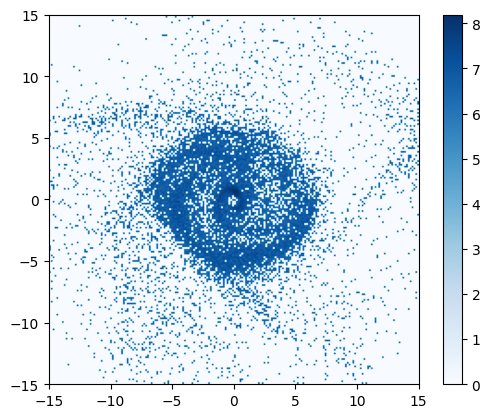

In [28]:
plt.imshow(np.log10(image_xy_gas+1).T,plt.cm.Blues,extent=(-15,15,-15,15),)
plt.colorbar()